In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [66]:
class Line:
    def __init__(self,origin,angle):
        self.origin = origin;
        self.angle = angle;
    def get(self,arr):
        y = np.tan(self.angle)*(np.array(arr)-self.origin)
        x = np.array(arr);
        return np.array([x,y])
        
class Laser_Scanner:
    def __init__(self, num_beams, angle, focal_point):
        #assume odd
        self.n = num_beams;
        self.angle = angle*np.pi/180;
        self.focal_point = focal_point;
        self.lines = [];
        self._create_lines();
    def _create_lines(self):
        for i in range(0,self.n):
            self.lines.append(Line(self.focal_point,(i+-1*int(self.n/2))*self.angle));
class Sinusoidal_Curve:
    def __init__(self,f=1,offset=2,peak=1):
        self.f = f;
        self.offset = offset;
        self.peak = peak;
    
    

Angle = -10.0 	Slope = -0.176326980708
Angle = -5.0 	Slope = -0.0874886635259
Angle = 0.0 	Slope = 0.0
Angle = 5.0 	Slope = 0.0874886635259
Angle = 10.0 	Slope = 0.176326980708


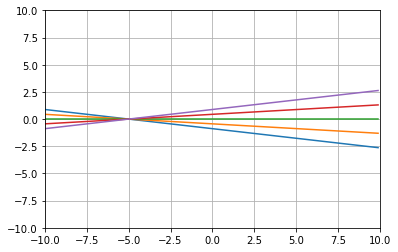

In [97]:
ang_diff = []
slope_diff = []
scanner = Laser_Scanner(5,5,-5)

x_min,x_max,x_step = -10,10,0.1
x_sweep = np.arange(x_min,x_max,x_step)
for line in scanner.lines:
    plt.grid();
    plt.xlim(x_min,x_max)
    plt.ylim(x_min,x_max)
    [x,y] = line.get(x_sweep);
    plt.plot(x,y)
    print("Angle =",line.angle*180/np.pi,"\tSlope =", np.tan(line.angle))
    ang_diff.append(line.angle);
    slope_diff.append(np.tan(line.angle))

In [22]:
scanner.focal_point[0]

0

In [36]:
np.array([1,2,3,4])-1

array([0, 1, 2, 3])

In [19]:
np.tan(np.pi/4)

0.99999999999999989

In [ ]:
np.arctan()